# **PA4** - Breast Cancer Classification using Support Vector Machine (SVM)

***


## 1. Exploratory Data Analysis (EDA)


###  1.1 Exploring the data

In [15]:
# Install necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Creating the Dataframe
# cancerdf = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],['target']))
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['target'] = cancer.target  # Add the target column


In [16]:
print(cancer['target_names'])
print(cancer['feature_names'])
print((cancer['data']).shape)


['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


The dataset has 569 samples and 30 features. Also there are two target value which are *malignant* and *benign*

In [17]:
cancerdf.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

The breast cancer dataset does not have NULL or missing value. This include the 30 features and the target value

In [18]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


###  1.2 Data visualization

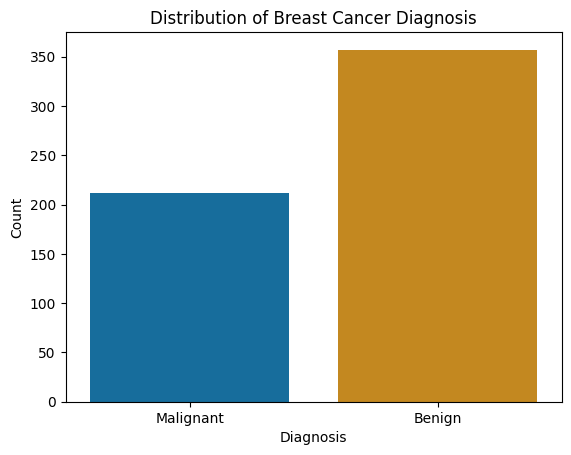

target
1    357
0    212
Name: count, dtype: int64


In [19]:
sns.countplot(x="target", data=cancerdf, hue="target", palette="colorblind", legend=False)
plt.xticks([0, 1], ["Malignant", "Benign"])  # Rename labels
plt.ylabel("Count")
plt.xlabel("Diagnosis")
plt.title("Distribution of Breast Cancer Diagnosis")
plt.show()

counts = cancerdf["target"].value_counts()
print(counts)



Base on the plot, there 357 benign cases and 212 malignang cases.

<Axes: >

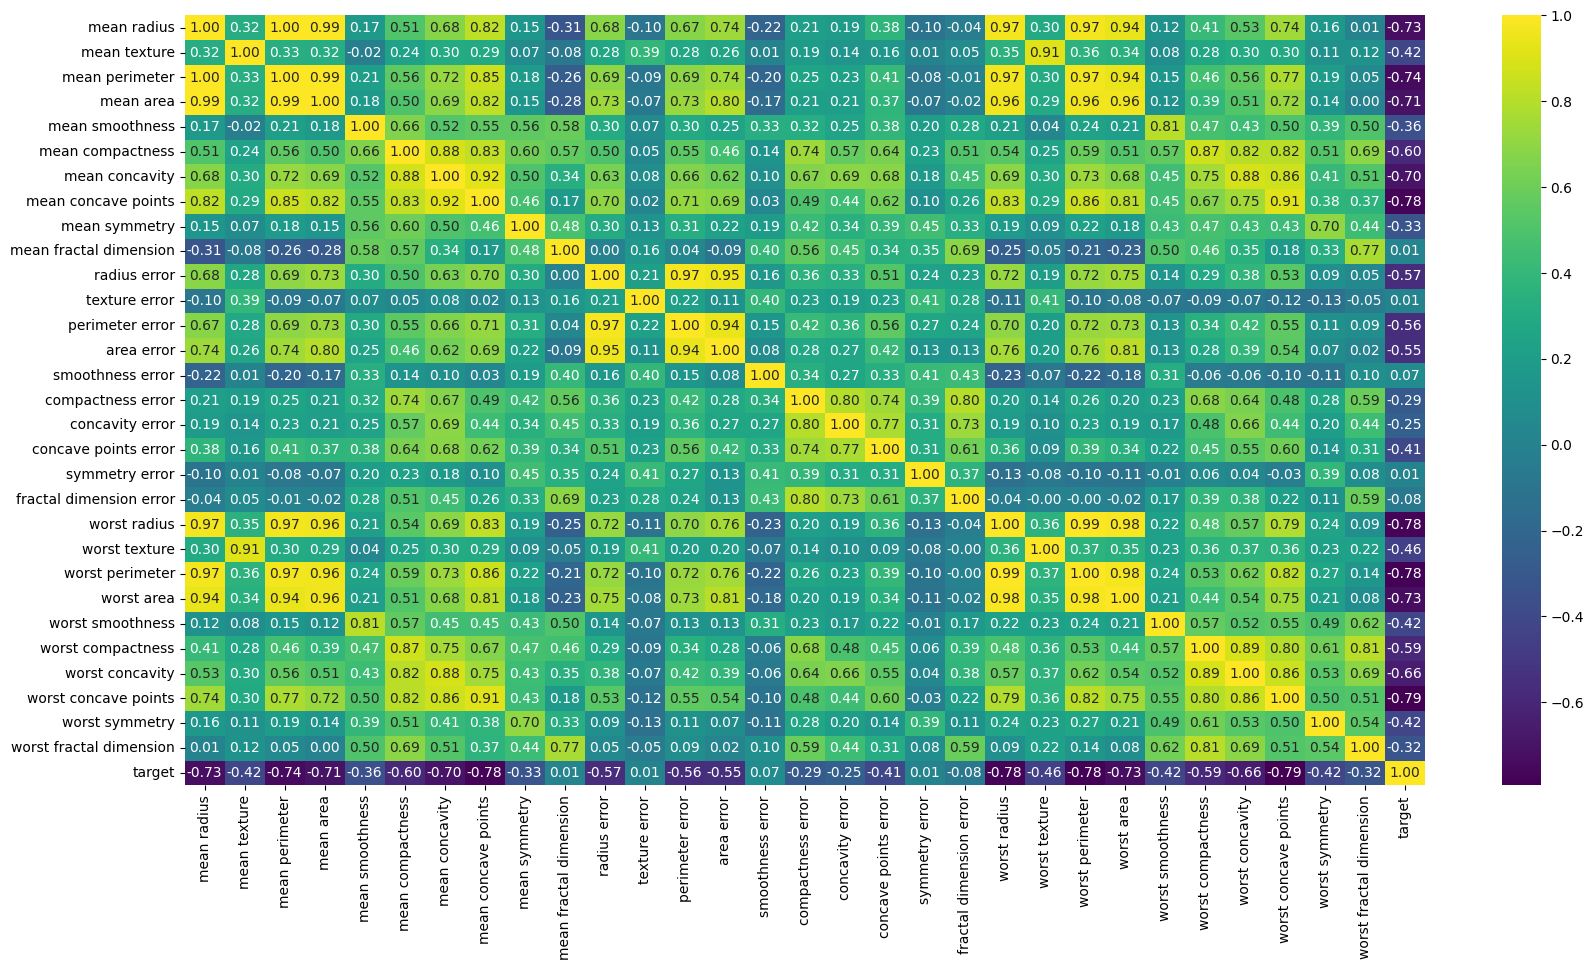

In [20]:
plt.figure(figsize=(20,10)) 
sns.heatmap(cancerdf.corr(), annot=True, cmap="viridis", fmt=".2f")

Base on the correlation map, features like mean radius, mean perimeter, and mean area are highly correlated (values close to 1.0). Similarly, worst radius, worst perimeter, and worst area also show strong correlation. Some features, such as mean concavity and mean smoothness, have negative correlations. Although some features shows correlation, the dataset has only 30 features, so dimensionality reduction is not required for performance reasons.

***


## 2. Data Preprocessing and Building Model


### 2.1 Data Preprocessing

In [21]:
X = cancerdf.drop(['target'],axis=1)
y = cancerdf['target']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### 2.2  SVM model with default parameters

Training Accuracy (Default SVM): 0.9824
Testing Accuracy (Default SVM): 0.9766


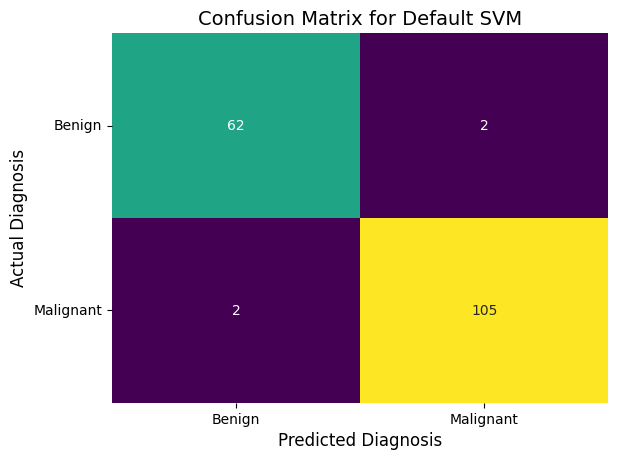


Classification Report (Default SVM):
               precision    recall  f1-score   support

   malignant     0.9688    0.9688    0.9688        64
      benign     0.9813    0.9813    0.9813       107

    accuracy                         0.9766       171
   macro avg     0.9750    0.9750    0.9750       171
weighted avg     0.9766    0.9766    0.9766       171

False Alarm Rate (FAR): 0.0312


In [22]:
svm_model_def = SVC()
svm_model_def.fit(x_train, y_train)


y_train_pred_def = svm_model_def.predict(x_train)
y_test_pred_def = svm_model_def.predict(x_test)


train_acc_def = accuracy_score(y_train, y_train_pred_def)
test_acc_def = accuracy_score(y_test, y_test_pred_def)

print(f"Training Accuracy (Default SVM): {train_acc_def:.4f}")
print(f"Testing Accuracy (Default SVM): {test_acc_def:.4f}")


conf_matrix_def = confusion_matrix(y_test, y_test_pred_def)
tn, fp, fn, tp = conf_matrix_def.ravel()

sns.heatmap(conf_matrix_def, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predicted Diagnosis", fontsize=12)
plt.ylabel("Actual Diagnosis", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"])
plt.yticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"], rotation=0)
plt.title("Confusion Matrix for Default SVM", fontsize=14)
plt.show()


print("\nClassification Report (Default SVM):\n", classification_report(y_test, y_test_pred_def, target_names=cancer.target_names, digits=4))
# Compute False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
print(f"False Alarm Rate (FAR): {false_alarm_rate:.4f}")


***

### 2.3 Hyperparameter Tuning using GridSearchCV with cv = 5

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters (cv=5): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy (cv=5): 0.9799
Testing Accuracy (cv=5): 0.9708
False Alarm Rate (FAR, cv=5): 0.0625


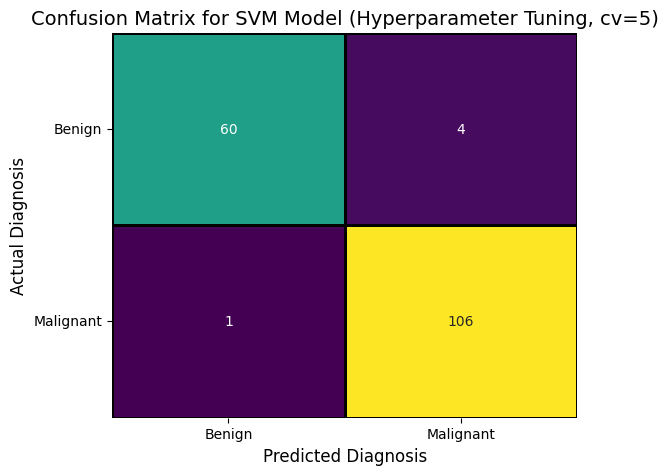


Classification Report (Hyperparameter Tuning, cv=5):
               precision    recall  f1-score   support

   malignant     0.9836    0.9375    0.9600        64
      benign     0.9636    0.9907    0.9770       107

    accuracy                         0.9708       171
   macro avg     0.9736    0.9641    0.9685       171
weighted avg     0.9711    0.9708    0.9706       171



In [23]:
param_grid_cv5 = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'kernel': ['linear', 'rbf', 'poly']  
}

svm_model_cv5 = SVC()
grid_search_cv5 = GridSearchCV(svm_model_cv5, param_grid_cv5, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_cv5.fit(x_train, y_train)

best_params_cv5 = grid_search_cv5.best_params_
print("Best Hyperparameters (cv=5):", best_params_cv5)

best_svm_cv5 = SVC(**best_params_cv5)
best_svm_cv5.fit(x_train, y_train)

y_train_pred_cv5 = best_svm_cv5.predict(x_train)
y_test_pred_cv5 = best_svm_cv5.predict(x_test)

train_acc_cv5 = accuracy_score(y_train, y_train_pred_cv5)
test_acc_cv5 = accuracy_score(y_test, y_test_pred_cv5)

print(f"Training Accuracy (cv=5): {train_acc_cv5:.4f}")
print(f"Testing Accuracy (cv=5): {test_acc_cv5:.4f}")

conf_matrix_cv5 = confusion_matrix(y_test, y_test_pred_cv5)
tn_cv5, fp_cv5, fn_cv5, tp_cv5 = conf_matrix_cv5.ravel()

false_alarm_rate_cv5 = fp_cv5 / (fp_cv5 + tn_cv5) if (fp_cv5 + tn_cv5) != 0 else 0
print(f"False Alarm Rate (FAR, cv=5): {false_alarm_rate_cv5:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_cv5, annot=True, fmt="d", cmap="viridis", cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Diagnosis", fontsize=12)
plt.ylabel("Actual Diagnosis", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"])
plt.yticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"], rotation=0)
plt.title("Confusion Matrix for SVM Model (Hyperparameter Tuning, cv=5)", fontsize=14)
plt.show()

print("\nClassification Report (Hyperparameter Tuning, cv=5):\n", classification_report(y_test, y_test_pred_cv5, target_names=cancer.target_names, digits=4))

In [24]:
# Identify important features using SelectFromModel (only if linear kernel is used)
if best_params_cv5['kernel'] == 'linear':
    selector = SelectFromModel(best_svm_cv5, prefit=True)
    selected_features = cancer.feature_names[selector.get_support()]
    print("\nMost Important Features:", list(selected_features))
else:
    print("\nFeature importance is not available for non-linear SVM kernels.")


Most Important Features: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('radius error'), np.str_('texture error'), np.str_('area error'), np.str_('compactness error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry')]


***

### 2.4 Hyperparameter Tuning using GridSearchCV with cv = 10

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Hyperparameters (cv=10): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy (cv=10): 0.9799
Testing Accuracy (cv=10): 0.9649
False Alarm Rate (FAR, cv=10): 0.0781


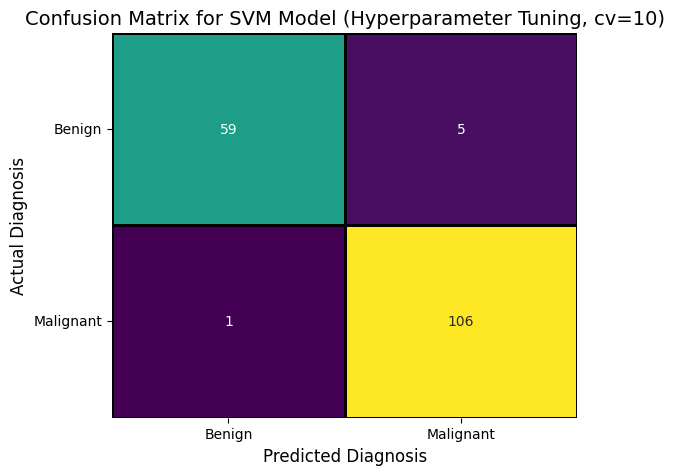


Classification Report (Hyperparameter Tuning, cv=10):
               precision    recall  f1-score   support

   malignant     0.9833    0.9219    0.9516        64
      benign     0.9550    0.9907    0.9725       107

    accuracy                         0.9649       171
   macro avg     0.9691    0.9563    0.9620       171
weighted avg     0.9656    0.9649    0.9647       171



In [25]:
param_grid_cv10 = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'kernel': ['linear', 'rbf', 'poly'] 
}

grid_search_cv10 = GridSearchCV(SVC(), param_grid_cv10, cv=10, scoring='accuracy', n_jobs=-1, verbose=1, refit=True)
grid_search_cv10.fit(x_train, y_train)

best_params_cv10 = grid_search_cv10.best_params_
print("Best Hyperparameters (cv=10):", best_params_cv10)

best_svm_cv10 = SVC(**best_params_cv10)
best_svm_cv10.fit(x_train, y_train)

y_train_pred_cv10 = best_svm_cv10.predict(x_train)
y_test_pred_cv10 = best_svm_cv10.predict(x_test)

train_acc_cv10 = accuracy_score(y_train, y_train_pred_cv10)
test_acc_cv10 = accuracy_score(y_test, y_test_pred_cv10)

print(f"Training Accuracy (cv=10): {train_acc_cv10:.4f}")
print(f"Testing Accuracy (cv=10): {test_acc_cv10:.4f}")

conf_matrix_cv10 = confusion_matrix(y_test, y_test_pred_cv10)
tn_cv10, fp_cv10, fn_cv10, tp_cv10 = conf_matrix_cv10.ravel()

false_alarm_rate_cv10 = fp_cv10 / (fp_cv10 + tn_cv10) if (fp_cv10 + tn_cv10) != 0 else 0
print(f"False Alarm Rate (FAR, cv=10): {false_alarm_rate_cv10:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_cv10, annot=True, fmt="d", cmap="viridis", cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Diagnosis", fontsize=12)
plt.ylabel("Actual Diagnosis", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"])
plt.yticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"], rotation=0)
plt.title("Confusion Matrix for SVM Model (Hyperparameter Tuning, cv=10)", fontsize=14)
plt.show()

print("\nClassification Report (Hyperparameter Tuning, cv=10):\n", classification_report(y_test, y_test_pred_cv10, target_names=cancer.target_names, digits=4))



In [26]:
# Identify important features using SelectFromModel (only if linear kernel is used)
if best_params_cv10['kernel'] == 'linear':
    selector = SelectFromModel(best_svm_cv10, prefit=True)
    selected_features = cancer.feature_names[selector.get_support()]
    print("\nMost Important Features:", list(selected_features))
else:
    print("\nFeature importance is not available for non-linear SVM kernels.")


Feature importance is not available for non-linear SVM kernels.


***

### 2.5 Building SVM model using most important features

Selected Features: ['mean compactness', 'mean concavity', 'texture error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points']
Accuracy with Selected Features: 0.9708

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

False Alarm Rate: 0.0312


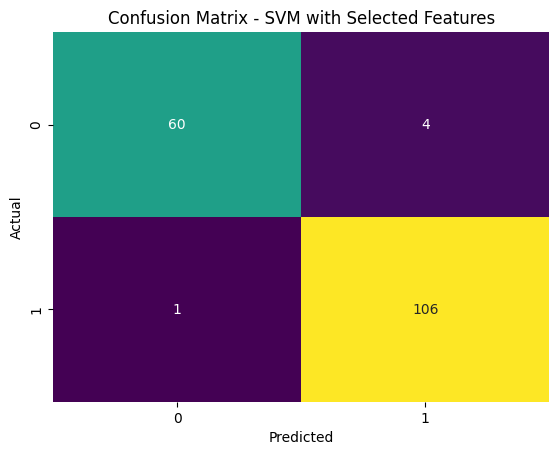

In [27]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

selector = SelectFromModel(svm, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

svm_selected = SVC(kernel='linear', C=1, random_state=42)
svm_selected.fit(X_train_selected, y_train)

y_pred_selected = svm_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy with Selected Features: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))
false_alarm_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
print(f"False Alarm Rate: {false_alarm_rate:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred_selected)
tn, fp, fn, tp = conf_matrix.ravel()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM with Selected Features")
plt.show()


***

## 3. Guide Questions

- ####  How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The dataset was split into training (70%) and testing (30%) using `train_test_split` with `stratify=y` to ensure class distribution remains balanced. Feature scaling was done by using  `StandardScaler()`, which standardizes features by removing the mean and scaling to unit variance., preventing large-valued features from dominating smaller ones. The dataset does not contain any missing values so no additional preprocessing for null values was done.

- #### Why is it necessary to split the dataset into training and testing sets?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Splitting the data into a training set and a test set is necessary for model validation, this enable us to develop and optimize the model (using the training data) before testing its performance on previously unseen data (the test data). Also, it prevents overfitting by making sure that the model is not just memorizing the data.

- #### What is the role of StandardScaler in SVM training?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; StandardScaler helps improve the performance and convergence of machine learning models, particularly those sensitive to feature scales like SVM, because SVM calculates distances between points in feature space. Also, standardization ensures all features contribute equally to decision boundaries and it prevents features with large numerical ranges from dominating the SVM optimization.

- #### How does C affect the performance of an SVM model?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The C hyperparameter tells the SVM optimization how much you want to avoid misclassifying each training example. **Smaller C** has larger margin, which allows some misclassifications. Meanwhile, **Larger C** has smaller margin, which has fewer misclassifications but risks overfitting.


- #### What is the purpose of the kernel function in SVM?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The purpose of kernel functions is to map the input data points into a higher-dimensional space where the separation between the two classes becomes easier. This allows SVM to solve complex non-linear problems as well. Three Kernels was used in this pragramming assignment. **Linear**, which works well for linearly separable data. **RBF (Radial Basis Function)**, which captures complex, non-linear relationships. Lastly, **Polynomial**, where models interactions between features but may lead to overfitting.


- ####  What were the best hyperparameters found using GridSearchCV?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For a cv of 5, the best hyperparameters are *Regularization parameter* 'C' is **0.1**. The *Kernel coefficient* for RBF, 'gamma' is **scale**. The *Kernel type*, 'kernel'is **linear**. For a cv of 10, the best hyperparamters are {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


- #### What is a confusion matrix, and how is it interpreted?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A confusion matrix is a table that summarizes classification performance.True Negative (TN), correctly predicted Benign cases. False Positive (FP), incorrectly predicted Malignant cases (False Alarm). False Negative (FN), missed actual Malignant cases. Lastly, True Positive (TP), correctly predicted Malignant cases.

[ TN  FP ] <br>
[ FN  TP ] <br>
<br>
In this dataset, the result shows that there are 60 True Negatives (correctly classified Malignant), 106 True Positives (correctly classified Benign), 4 False Positives (incorrectly classified Benign as Malignant), and 1 False Negative (incorrectly classified Malignant as Benign)


- #### How are Precision, Recall, and F1-score calculated from the confusion matrix?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The function `classification_report`was utilized to compute the Precision, Recall, and F1-score calculated from the confusion matrix.
<br>
<br>
To manually compute: <br>
For Precision: precision = tp / (tp + fp) if (tp + fp)
<br>
For recall: recall = tp / (tp + fn) if (tp + fn)
<br>
For f1 score: f1_score = 2 * (precision * recall) / (precision + recall)

#### 9. If the model does not perform well, what adjustments can be made to improve it?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Another way to improve the model is to adjust the hyperparameter Tuning by further refining C, gamma, and kernel. Also, high correlation between some features may lead to multicollinearity, which can affect machine learning models. Feature engineering may be done such as reducing redundant features to improve model performance and reduce overfitting. Lastly, PCA (Principal Component Analysis) can be done to transform correlated features into uncorrelated principal components for better SVM performance.